In [1]:
import glob
import os
import pandas as pd
import numpy as np

### Merging 12 months of sales data into a single file

In [2]:
def megeFiles(lst):
    combined_csv = pd.concat([pd.read_csv(f) for f in lst], axis=0)
    return combined_csv

def getFiles(path, extension='.csv'):
    files = os.listdir(path)
    return [path + filename for filename in files if filename.endswith(extension)]


#Driver code
csv_files = getFiles('./Sales_Data/')

if len(csv_files)>0:
    mergeddf = megeFiles(csv_files)
    merged_file = mergeddf.to_csv("./mergedData.csv", index=False)
else:
    print("No csv files found in the given path")

### Read merged dataframe:

In [3]:
all_data = pd.read_csv("mergedData.csv")
all_data[0:10]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001"
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035"
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001"
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001"
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001"


### Clean up the data :1 Drop NaN

In [4]:
# Finding nan cells
# nan_df = all_data[all_data.isna()]
# nan_df.head()

all_data = all_data.dropna(how='all')

### Clean up the data :2 Find 'Or' and delete it

In [5]:
all_data = all_data[all_data["Order Date"].str[0:2]!="Or"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Augment data with Additional columns:

### Task:2 Add Month Column

In [6]:
all_data["order_month"]= all_data["Order Date"].str[0:2]
all_data["order_month"] = all_data["order_month"].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Task:3  Convert columns to the correct data types

In [7]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Task:4 Add a column for sales

In [8]:
all_data["Sales"]=all_data["Quantity Ordered"]*all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


### Task:5 Add a column for city name and state

In [9]:
# Method-1
# all_data["City"]=all_data["Purchase Address"].str.split(',').str[1]
# all_data.head(10)

#method-2
def get_city(astr):
    return astr.split(",")[1]

def get_state(astr):
    return astr.split(",")[2]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY 10001
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY 10001
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY 10001
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA 94016
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA 30301


### Task:6 Add a column for Order time in hours

In [10]:
#method 1
# def getHours(datetime_str):
#     return datetime_str.split(' ')[1].split(':')[0]
# all_data['Order Time'] = all_data['Order Date'].apply(lambda x: getHours(x))
# all_data.head()

#Method 2: Pythonic way using datetime library
#Convert into date time object and then access any units
all_data["Order Date"] = pd.to_datetime(all_data['Order Date'])
all_data.head()
all_data["Order Hour"] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_month,Sales,City,Order Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY 10001,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY 10001,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY 10001,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA 94016,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA 30301,12


### Question#1 What was the best month for sales? How much was earned that month?

In [11]:
results = all_data.groupby("order_month").sum()

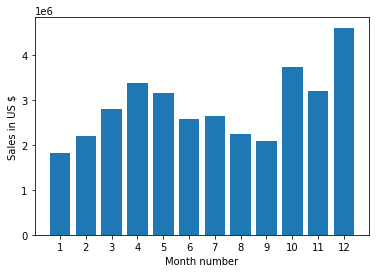

In [12]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in US $")
plt.xlabel('Month number')
plt.show()

### Question#2 Which city had the highest number of sales?

Text(0.5, 0, 'City name')

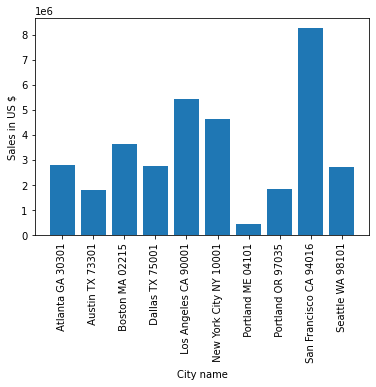

In [13]:
city_results = all_data.groupby("City").sum()

# Below gets us the unique cities but this changes the order
# cities = all_data["City"].unique()
# Note: .unique does not maintains the order/sequence

#To get the cities in order we can use the method below:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, city_results["Sales"])
plt.xticks(cities, rotation='vertical')
plt.ylabel("Sales in US $")
plt.xlabel('City name')
# plt.show()

### Question#3 What time should we display advertisements to maximize likelihood of customer's buying product?

In [14]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_month,Sales,City,Order Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY 10001,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY 10001,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY 10001,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA 94016,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA 30301,12


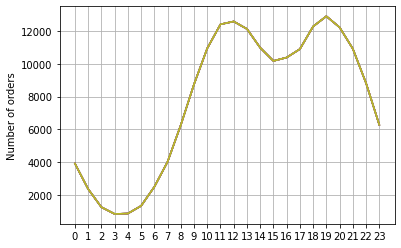

In [15]:
hours = [ hour for hour, df in all_data.groupby('Order Hour')]
plt.plot(hours, all_data.groupby('Order Hour').count())
plt.xticks(hours)
plt.ylabel('Number of orders')
plt.grid()
plt.show()


### Question#4 What products are the most often sold together?

In [30]:
df = all_data[all_data["Order ID"].duplicated(keep=False)] 
#keep=False to keep all the duplicates

df["Grouped"] = df.groupby("Order ID")['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [36]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### Question#5 What product was sold the most and why?

In [41]:
#below code is not a correct solution because we didn't consider the quantity ordered
product_count = Counter([product for product in all_data["Product"]])
product_count

Counter({'Macbook Pro Laptop': 4724,
         'LG Washing Machine': 666,
         'USB-C Charging Cable': 21903,
         '27in FHD Monitor': 7507,
         'AA Batteries (4-pack)': 20577,
         'Bose SoundSport Headphones': 13325,
         'AAA Batteries (4-pack)': 20641,
         'ThinkPad Laptop': 4128,
         'Lightning Charging Cable': 21658,
         'Google Phone': 5525,
         'Wired Headphones': 18882,
         'Apple Airpods Headphones': 15549,
         'Vareebadd Phone': 2065,
         'iPhone': 6842,
         '20in Monitor': 4101,
         '34in Ultrawide Monitor': 6181,
         'Flatscreen TV': 4800,
         '27in 4K Gaming Monitor': 6230,
         'LG Dryer': 646})

In [51]:
#method#1
all_data.head()
all_data.groupby('Product').sum()


,Quantity Ordered,Price Each,order_month,Sales,Order Hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


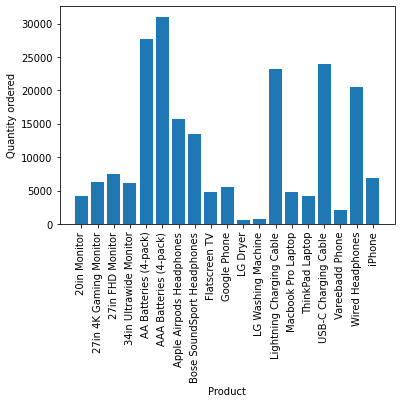

In [52]:
#Method#2
quantity_ordered = all_data.groupby('Product').sum()['Quantity Ordered']
products = [product for product, _ in all_data.groupby('Product')]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical')
plt.ylabel('Quantity ordered')
plt.xlabel('Product')
plt.show()

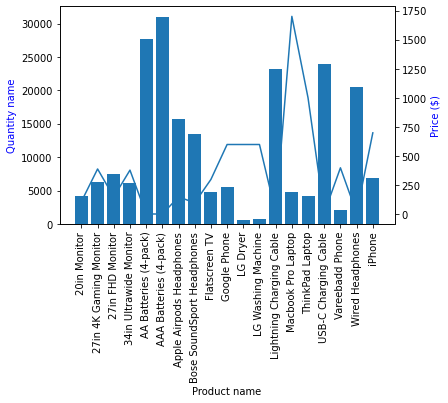

In [63]:
prices = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, prices)

ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity name', color='b')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical')
plt.show()